<a href="https://colab.research.google.com/github/MeAmarP/opencv_snipps/blob/master/Helpful_Python_snippets_for_Image_Processing_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import skimage

In [2]:
print('OpenCV-Python Lib Version:', cv2.__version__)
print('Skimage Version:', skimage.__version__)
print('Python Version:',sys.version)

OpenCV-Python Lib Version: 3.4.3
Skimage Version: 0.15.0
Python Version: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [3]:
!git clone https://github.com/MeAmarP/opencv_snipps.git
import os
os.listdir('/content/opencv_snipps/imgs/')

Cloning into 'opencv_snipps'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 50 (delta 14), reused 45 (delta 12), pack-reused 0
Unpacking objects: 100% (50/50), done.


['cells_bin.png',
 'tank_gry.tiff',
 'skittle_rgb.tiff',
 'lena_gry.bmp',
 'bricks_in_wall_bin.tiff',
 'lun1_rgb.gif',
 'fruitbowl_rgb.jpg',
 'alg_gry.jpg',
 'Wb_girl_rgb.jpg']


## 1. Basic I/0: Understand Image and its Represenations in OpenCV
### Types of Images:
+ Binary : 2D Array of pixels,where Pixel Value is either 0 or 255.
+ Grayscale : 2D Array of pixels,where Pixel Value is anything between 0-255 
+ RGB/TrueColor : 3D Array of pixels,where Pixel Value is anything between 0-255 

Note: RGB pixel format is quit standard among MATLAB or other image processing liberaies, but OpenCV uses BGR pixel format.

In [4]:
MainImgBin = cv2.imread('/content/opencv_snipps/imgs/cells_bin.png',cv2.IMREAD_UNCHANGED)
MainImgBGR = cv2.imread('/content/opencv_snipps/imgs/fruitbowl_rgb.jpg',cv2.IMREAD_UNCHANGED)
MainImgGray = cv2.imread('/content/opencv_snipps/imgs/alg_gry.jpg',cv2.IMREAD_UNCHANGED)

print('DatatypeClass of Image:',type(MainImgBGR))
print('Shape/Size of RGB Img:', MainImgBGR.shape)
print('Shape/Size of Gray Img:', MainImgGray.shape)
print('Shape/Size of Binary Img:', MainImgBin.shape)

# Why use cv2.IMREAD_UNCHANGED with IMREAD?
# https://stackoverflow.com/a/18871394
# https://docs.opencv.org/3.4.3/d4/da8/group__imgcodecs.html#gga292d81be8d76901bff7988d18d2b42acae80c3e72393ec86b8ea1db4a2a228b5f

DatatypeClass of Image: <class 'numpy.ndarray'>
Shape/Size of RGB Img: (625, 960, 3)
Shape/Size of Gray Img: (512, 512)
Shape/Size of Binary Img: (476, 638)


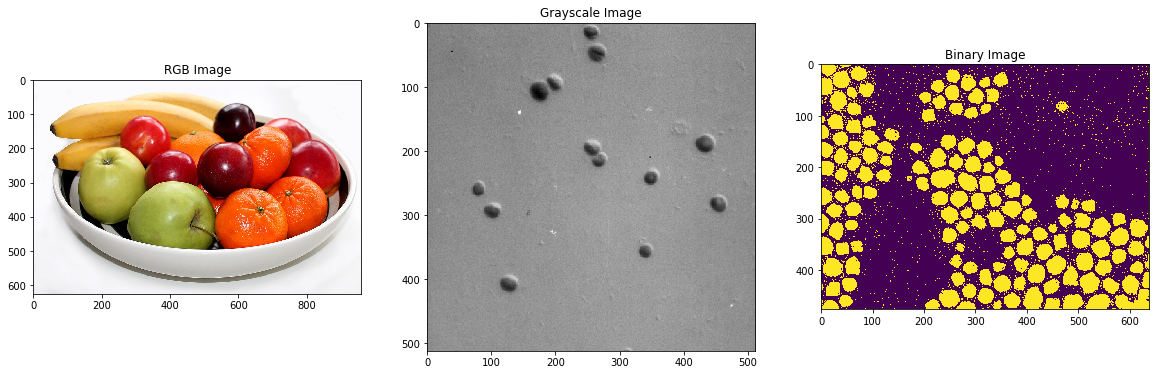

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
#Note: matplotlib uses RGB format so had to convert BGR-to-RGB
plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
plt.title('RGB Image')
plt.subplot(1,3,2)
plt.imshow(MainImgGray,cmap='gray')
plt.title('Grayscale Image')
plt.subplot(1,3,3)
plt.imshow(MainImgBin)
plt.title('Binary Image')
plt.show()

## 2. Basic Operations:
    - Convert to Gray/Binary
    - Change Colorspaces
    - Resize
    - Flip
    - Rotate
    - Crop

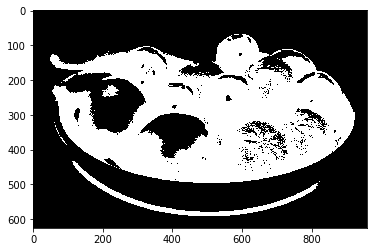

In [6]:
#Convert to Gray
img_gry = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2GRAY)

#Convert to Binary
# Method: Basic Thresholding
ret,img_bin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY)
ret,img_bininv = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY_INV)

# Method: Adaptive Thresholding
img_adp_gusbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,5)
img_adp_meanbin = cv2.adaptiveThreshold(img_gry,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,5)

# Method: Otsu's Thresholding
ret,img_Otsubin = cv2.threshold(img_gry,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img_Otsubin,cmap='binary')

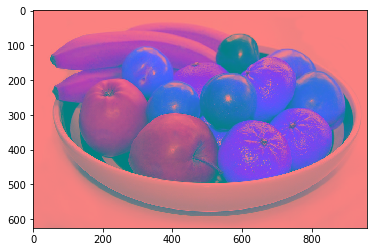

In [0]:
#Changing Color Spaces
img_hls = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HLS)
img_hsv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2LAB)
img_yuv = cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2YUV)
plt.imshow(img_yuv)